In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/zameen/Entities.csv')
df.head(2)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056


In [3]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url','latitude','longitude','agency', 'location','agent'],axis = 1, inplace = True)
df.head(2)

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,2,For Sale,2,2/4/2019,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,3,For Sale,3,5/4/2019,15246.056


In [5]:
df.shape

(168446, 9)

In [6]:
df.isnull().sum()

property_type    0
price            0
city             0
province_name    0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   city           168446 non-null  object 
 3   province_name  168446 non-null  object 
 4   baths          168446 non-null  int64  
 5   purpose        168446 non-null  object 
 6   bedrooms       168446 non-null  int64  
 7   date_added     168446 non-null  object 
 8   Total_Area     168446 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 11.6+ MB


In [8]:
df.describe(include = 'all')

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
count,168446,1.684460e+05,168446,168446,168446.000000,168446,168446.000000,168446,1.684460e+05
unique,7,NaN,5,3,NaN,2,NaN,124,NaN
top,House,NaN,Karachi,Punjab,NaN,For Sale,NaN,7/3/2019,NaN
freq,105468,NaN,60484,70536,NaN,120655,NaN,9485,NaN
mean,NaN,1.776576e+07,NaN,NaN,2.874227,NaN,3.179422,NaN,1.394239e+04
std,NaN,3.531003e+07,NaN,NaN,2.463400,NaN,1.971401,NaN,8.623647e+05
min,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00
25%,NaN,1.750000e+05,NaN,NaN,0.000000,NaN,2.000000,NaN,1.905757e+03
50%,NaN,8.500000e+06,NaN,NaN,3.000000,NaN,3.000000,NaN,4.356016e+03
75%,NaN,1.950000e+07,NaN,NaN,4.000000,NaN,4.000000,NaN,1.197904e+04


In [9]:
df.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [10]:
df.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [11]:
df.province_name.unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [12]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

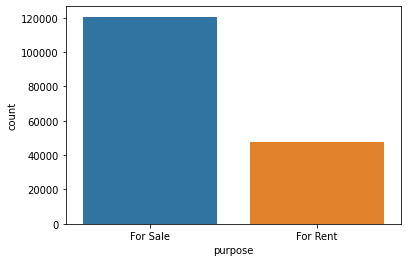

In [13]:
sns.countplot(x ='purpose', data = df)
plt.show()

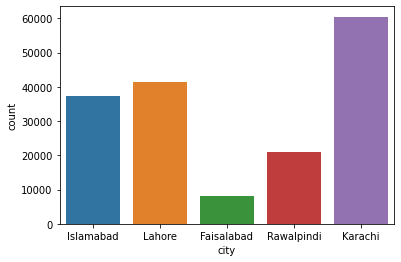

In [14]:
sns.countplot(x ='city', data = df)
plt.show()

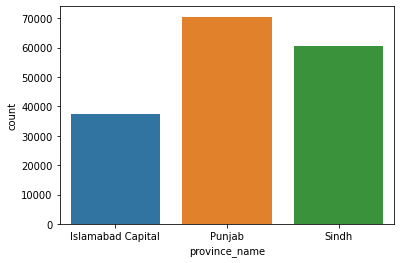

In [15]:
sns.countplot(x ='province_name', data = df)
plt.show()

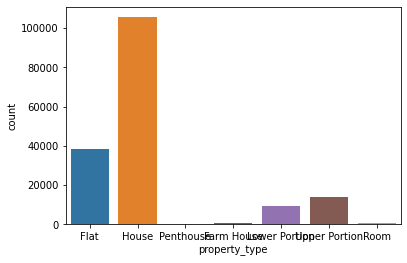

In [16]:
sns.countplot(x ='property_type', data = df)
plt.show()

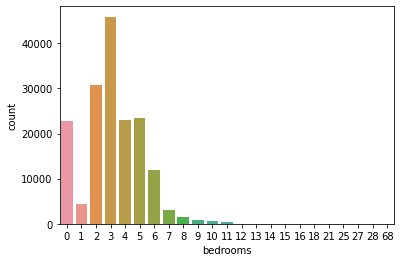

In [17]:
sns.countplot(x ='bedrooms', data = df)
plt.show()

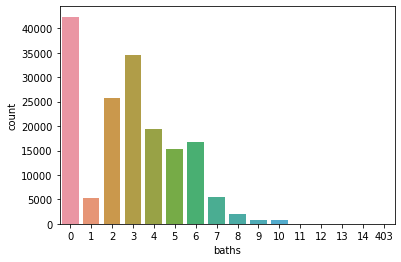

In [18]:
sns.countplot(x ='baths', data = df)
plt.show()

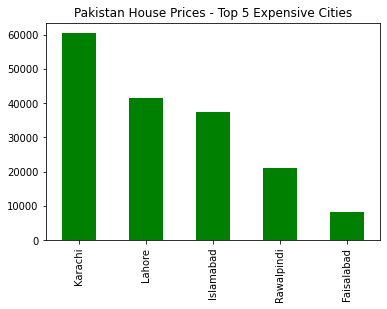

In [19]:
df['city'].value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.title('Pakistan House Prices - Top 5 Expensive Cities')
plt.show()

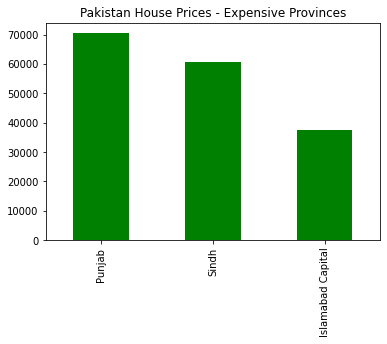

In [20]:
df['province_name'].value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.title('Pakistan House Prices - Expensive Provinces')
plt.show()

In [21]:
# splitting dataset on the basis of rent and sale
df_rent = df[df['purpose']=='For Rent']
df_sale = df[df['purpose']=='For Sale']

## Working with Sales Dataset

In [22]:
df1 = df_sale.sample(3000)
df1.shape

(3000, 9)

In [23]:
df1.describe(include = 'all')

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
count,3000,3.000000e+03,3000,3000,3000.000000,3000,3000.000000,3000,3000.000000
unique,6,NaN,5,3,NaN,1,NaN,89,NaN
top,House,NaN,Karachi,Punjab,NaN,For Sale,NaN,7/3/2019,NaN
freq,2198,NaN,1193,1430,NaN,3000,NaN,167,NaN
mean,NaN,2.453966e+07,NaN,NaN,3.081000,NaN,3.403333,NaN,9279.300947
std,NaN,3.721824e+07,NaN,NaN,2.243832,NaN,1.868998,NaN,16530.962952
min,NaN,1.200000e+04,NaN,NaN,0.000000,NaN,0.000000,NaN,272.251000
25%,NaN,7.379750e+06,NaN,NaN,2.000000,NaN,2.000000,NaN,1633.506000
50%,NaN,1.350000e+07,NaN,NaN,3.000000,NaN,3.000000,NaN,3811.514000
75%,NaN,2.550000e+07,NaN,NaN,5.000000,NaN,5.000000,NaN,11434.542000


In [24]:
df1.isnull().sum()

property_type    0
price            0
city             0
province_name    0
baths            0
purpose          0
bedrooms         0
date_added       0
Total_Area       0
dtype: int64

In [25]:
for column in df1.columns:
    print(df1[column].value_counts())
    print('*'*20)

House            2198
Flat              686
Upper Portion      67
Lower Portion      30
Farm House         14
Penthouse           5
Name: property_type, dtype: int64
********************
6500000      62
15000000     58
12500000     57
11500000     56
13000000     56
             ..
7410000       1
275000000     1
2100000       1
3150000       1
6620000       1
Name: price, Length: 412, dtype: int64
********************
Karachi       1193
Lahore        1066
Islamabad      377
Rawalpindi     258
Faisalabad     106
Name: city, dtype: int64
********************
Punjab               1430
Sindh                1193
Islamabad Capital     377
Name: province_name, dtype: int64
********************
0     653
3     602
2     445
4     354
5     348
6     334
7     118
1      92
8      30
9      13
10     10
12      1
Name: baths, dtype: int64
********************
For Sale    3000
Name: purpose, dtype: int64
********************
3     815
2     521
5     496
4     468
0     295
6     228
1      58


### Handling Columns 'baths' and 'bedrooms'

<AxesSubplot:>

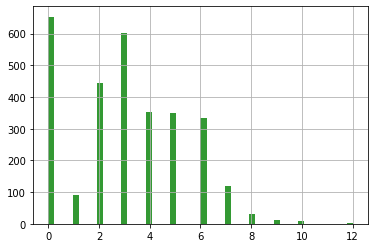

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['baths'].hist(bins = 50, ax =ax, color = 'green', alpha = 0.8 )

In [27]:
df1[df1['baths']==0]

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
166566,House,12500000,Lahore,Punjab,0,For Sale,2,7/17/2019,2722.510
70534,House,19500000,Lahore,Punjab,0,For Sale,5,5/4/2019,2722.510
101822,Upper Portion,2200000,Karachi,Sindh,0,For Sale,0,6/27/2019,4900.518
127961,House,75400000,Karachi,Sindh,0,For Sale,0,7/3/2019,3267.012
101433,House,37000000,Lahore,Punjab,0,For Sale,0,6/25/2019,5445.000
...,...,...,...,...,...,...,...,...,...
52280,Flat,4500000,Karachi,Sindh,0,For Sale,2,5/4/2019,8984.283
62472,House,12000000,Karachi,Sindh,0,For Sale,4,5/6/2019,1089.004
143618,House,4700000,Karachi,Sindh,0,For Sale,0,7/10/2019,9256.534
6966,Flat,2700000,Karachi,Sindh,0,For Sale,3,7/18/2019,1089.004


In [28]:
int(df1['baths'].mean())

3

In [29]:
# Replacing 0 values with mean
df1['baths'].replace(0,int(df1['baths'].mean()),inplace = True)

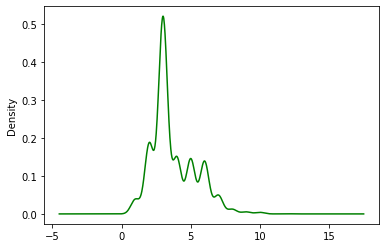

In [30]:
df1['baths'].plot.density(color='green')
plt.show()

<AxesSubplot:xlabel='baths', ylabel='price'>

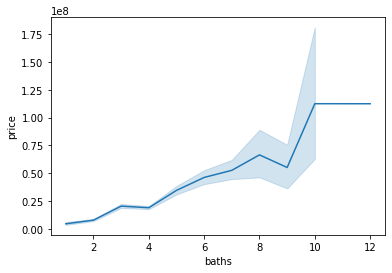

In [31]:
sns.lineplot(x = 'baths', y = 'price', data = df1)

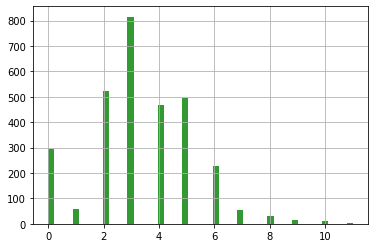

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['bedrooms'].hist(bins = 50, ax =ax, color = 'green', alpha = 0.8 )
plt.show()

In [33]:
df1[df1['bedrooms']==0]

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
101822,Upper Portion,2200000,Karachi,Sindh,3,For Sale,0,6/27/2019,4900.518
127961,House,75400000,Karachi,Sindh,3,For Sale,0,7/3/2019,3267.012
101433,House,37000000,Lahore,Punjab,3,For Sale,0,6/25/2019,5445.000
466,House,75000000,Lahore,Punjab,3,For Sale,0,5/3/2019,81675.000
78204,House,60000000,Faisalabad,Punjab,3,For Sale,0,6/16/2019,141570.000
...,...,...,...,...,...,...,...,...,...
26179,Upper Portion,7500000,Karachi,Sindh,3,For Sale,0,5/6/2019,13068.048
139341,Flat,16000000,Islamabad,Islamabad Capital,3,For Sale,0,7/10/2019,5989.522
77405,House,15000000,Islamabad,Islamabad Capital,3,For Sale,0,6/3/2019,18240.817
143618,House,4700000,Karachi,Sindh,3,For Sale,0,7/10/2019,9256.534


In [34]:
# Replacing 0 values with mean
df1['bedrooms'].replace(0,int(df1['bedrooms'].mean()),inplace = True)

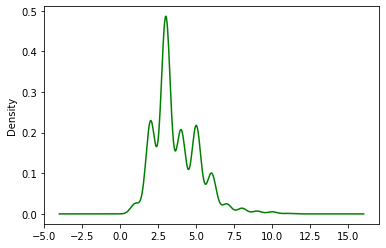

In [35]:
df1['bedrooms'].plot.density(color='green')
plt.show()

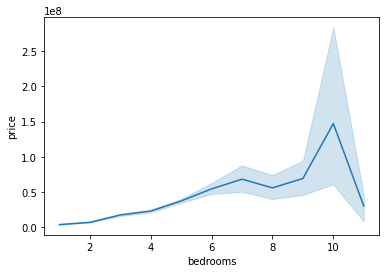

In [36]:
sns.lineplot(x = 'bedrooms', y = 'price', data = df1)
plt.show()

In [37]:
df1.describe()

,price,baths,bedrooms,Total_Area
count,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,2.453966e+07,3.734000,3.698333,9279.300947
std,3.721824e+07,1.594603,1.510880,16530.962952
min,1.200000e+04,1.000000,1.000000,272.251000
25%,7.379750e+06,3.000000,3.000000,1633.506000
50%,1.350000e+07,3.000000,3.000000,3811.514000
75%,2.550000e+07,5.000000,5.000000,11434.542000
max,7.500000e+08,12.000000,11.000000,392040.000000


### Handling Column 'price'

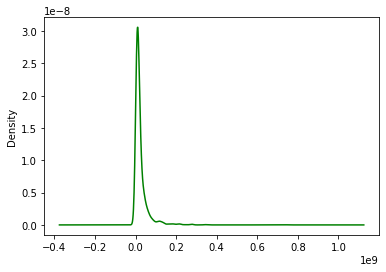

In [38]:
df1['price'].plot.density(color='green')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


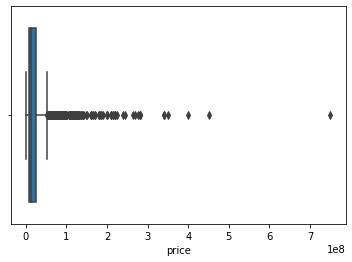

In [39]:
sns.boxplot(df1['price'])
plt.show()

In [40]:
print(df1.price.max()) # Remove this outlier
df2 = df1[df1['price'] < 400000000] 

750000000


In [41]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.997000e+03,2997.000000,2997.000000,2997.000000
mean,2.403036e+07,3.733066,3.694361,9263.154101
std,3.321426e+07,1.594639,1.505446,16531.151467
min,1.200000e+04,1.000000,1.000000,272.251000
25%,7.364000e+06,3.000000,3.000000,1633.506000
50%,1.350000e+07,3.000000,3.000000,3811.514000
75%,2.500000e+07,5.000000,5.000000,11434.542000
max,3.500000e+08,12.000000,11.000000,392040.000000


In [42]:
df2.head(2)

,property_type,price,city,province_name,baths,purpose,bedrooms,date_added,Total_Area
54472,House,39000000,Lahore,Punjab,6,For Sale,5,4/4/2019,2722.510
139518,Upper Portion,5000000,Karachi,Sindh,2,For Sale,2,7/10/2019,6534.024


In [43]:
df2.drop(['purpose','date_added'],axis = 1, inplace = True)
df2.shape

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2997, 7)

In [44]:
df2.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area
54472,House,39000000,Lahore,Punjab,6,5,2722.510
139518,Upper Portion,5000000,Karachi,Sindh,2,2,6534.024


In [45]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.997000e+03,2997.000000,2997.000000,2997.000000
mean,2.403036e+07,3.733066,3.694361,9263.154101
std,3.321426e+07,1.594639,1.505446,16531.151467
min,1.200000e+04,1.000000,1.000000,272.251000
25%,7.364000e+06,3.000000,3.000000,1633.506000
50%,1.350000e+07,3.000000,3.000000,3811.514000
75%,2.500000e+07,5.000000,5.000000,11434.542000
max,3.500000e+08,12.000000,11.000000,392040.000000


### Handling Column 'Total_Area'

<AxesSubplot:ylabel='Density'>

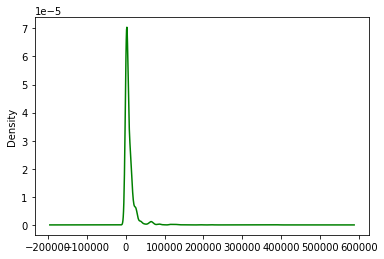

In [46]:
df2['Total_Area'].plot.density(color='green')

In [47]:
# Replacing 0 values with mean
df2['Total_Area'].replace(0,df2['Total_Area'].mean(),inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:ylabel='Density'>

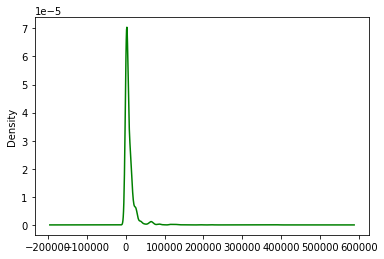

In [48]:
df2['Total_Area'].plot.density(color='green')

In [49]:
df2.describe()

,price,baths,bedrooms,Total_Area
count,2.997000e+03,2997.000000,2997.000000,2997.000000
mean,2.403036e+07,3.733066,3.694361,9263.154101
std,3.321426e+07,1.594639,1.505446,16531.151467
min,1.200000e+04,1.000000,1.000000,272.251000
25%,7.364000e+06,3.000000,3.000000,1633.506000
50%,1.350000e+07,3.000000,3.000000,3811.514000
75%,2.500000e+07,5.000000,5.000000,11434.542000
max,3.500000e+08,12.000000,11.000000,392040.000000


## Handling Categorical Data - One Hot Encoding

In [50]:
df2.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area
54472,House,39000000,Lahore,Punjab,6,5,2722.510
139518,Upper Portion,5000000,Karachi,Sindh,2,2,6534.024


In [51]:
df2.property_type.unique()

array(['House', 'Upper Portion', 'Flat', 'Farm House', 'Lower Portion',
       'Penthouse'], dtype=object)

In [52]:
# property_type - Column

dummies=pd.get_dummies(df2['property_type'],drop_first=True)

In [53]:
dummies

,Flat,House,Lower Portion,Penthouse,Upper Portion
54472,0,1,0,0,0
139518,0,0,0,0,1
17879,1,0,0,0,0
118584,1,0,0,0,0
62082,0,1,0,0,0
...,...,...,...,...,...
6966,1,0,0,0,0
90563,0,1,0,0,0
127268,0,1,0,0,0
81427,0,1,0,0,0


In [54]:
df=pd.concat([df2,dummies],axis=1)
df.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion
54472,House,39000000,Lahore,Punjab,6,5,2722.510,0,1,0,0,0
139518,Upper Portion,5000000,Karachi,Sindh,2,2,6534.024,0,0,0,0,1


In [55]:
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion'],
      dtype='object')

In [56]:
# City - Column

dummies = pd.get_dummies(df['city'],drop_first=True)

In [57]:
df = pd.concat([df, dummies], axis = 1)
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi'],
      dtype='object')

In [58]:
# province_name - Column

dummies = pd.get_dummies(df['province_name'],drop_first=True)

In [59]:
df = pd.concat([df, dummies], axis = 1)
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'baths', 'bedrooms',
       'Total_Area', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Upper Portion', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi',
       'Punjab', 'Sindh'],
      dtype='object')

In [60]:
df.head(2)

,property_type,price,city,province_name,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh
54472,House,39000000,Lahore,Punjab,6,5,2722.510,0,1,0,0,0,0,0,1,0,1,0
139518,Upper Portion,5000000,Karachi,Sindh,2,2,6534.024,0,0,0,0,1,0,1,0,0,0,1


In [61]:
df.drop(['property_type','city','province_name'], axis = 1, inplace = True)
df.head(2)

,price,baths,bedrooms,Total_Area,Flat,House,Lower Portion,Penthouse,Upper Portion,Islamabad,Karachi,Lahore,Rawalpindi,Punjab,Sindh
54472,39000000,6,5,2722.510,0,1,0,0,0,0,0,1,0,1,0
139518,5000000,2,2,6534.024,0,0,0,0,1,0,1,0,0,0,1


## Model Training 

In [62]:
X = df.drop(['price'],axis =1)
y = df['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)    #20% data is for evaluation of Model performance

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.35462450779870436

In [67]:
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_test=lr.score(X_test, y_test)
lr_rmse,lr_test

(26646250.355145115, 0.3700692638631268)

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train, y_train)

0.898168346539756

In [69]:
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score=rfr.score(X_test,y_test)
rfr_score, rfr_rmse

(0.5887401690923914, 21530189.41605808)

In [70]:
!pip install xgboost

In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [72]:
xgb=XGBRegressor(ets=0.1,gamma=10)

In [73]:

xgb.fit(X_train,y_train)
xgb.score(X_train, y_train)

[06:23:08] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9278185375197732

In [74]:

xgb_rmse = rmse(y_test, xgb.predict(X_test))
xgb_score=xgb.score(X_test,y_test)
xgb_score, xgb_rmse

(0.6305412125843534, 20406696.459065095)

In [75]:
print('XGBoost',np.mean(cross_val_score(xgb,X_train,y_train,cv=10)))

[06:23:08] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:23:09] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:23:09] WARNING: ../src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wro

#### Automatically Select Best Model

In [76]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 5.2 MB/s eta 0:00:00


In [77]:
from flaml import AutoML

In [78]:
#initialize AutoML instance
automl=AutoML()

In [79]:
#specify automl goal and constraint
automl_settings={"time_budget":10,  # in seconds
                 "metric":'r2',
                 "task":'regression',
                 "log_file_name":"house"}

#train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)
#Predict
print(automl.predict(X_train))
#Export the best model
print(automl.model)

[flaml.automl: 11-27 06:23:26] {2599} INFO - task = regression
[flaml.automl: 11-27 06:23:26] {2601} INFO - Data split method: uniform
[flaml.automl: 11-27 06:23:26] {2604} INFO - Evaluation method: holdout
[flaml.automl: 11-27 06:23:26] {2726} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-27 06:23:27] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-27 06:23:27] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-27 06:23:27] {3297} INFO - Estimated sufficient time budget=1228s. Estimated necessary time budget=11s.
[flaml.automl: 11-27 06:23:27] {3349} INFO -  at 0.4s,	estimator lgbm's best error=0.8177,	best estimator lgbm's best error=0.8177
[flaml.automl: 11-27 06:23:27] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-27 06:23:27] {3349} INFO -  at 0.4s,	estimator lgbm's best error=0.8177,	best estimator lgbm's best error=0.8177
[flaml.automl: 11-27 06:23

[1.0547922e+07 2.3027360e+06 1.8488931e+08 ... 2.3027360e+06 3.6625612e+07
 7.9575645e+06]


In [80]:
!pip install lightgbm

In [81]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
lgb.score(X_train, y_train)

0.7707607525403023

In [82]:
lgb_rmse = rmse(y_test, lgb.predict(X_test))
lgb_score=lgb.score(X_test,y_test)
lgb_score, lgb_rmse

(0.7164294802512867, 17878053.967491947)

In [83]:
print('XGBoostLimitDepthEstimator',np.mean(cross_val_score(lgb,X_train,y_train,cv=10)))

XGBoostLimitDepthEstimator 0.6112794360971507
